In [3]:
import csv
import numpy as np

# helper function for reading the contents of the SensorTablePartial.csv file in a nice way
def read_sensor_table_data(filename):
    
    result = []
    
    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile, delimiter=',')
        
        row_num = 0
        
        for row in reader:
            if row_num > 0: 
                col_num = 0
                
                processed_row = []
            
                for col in row:   
                    if col_num >= 2 and col_num <= 5:      
                        processed_row.append(float(col))
                    
                    elif col_num == 1 or col_num == 6:   
                        processed_row.append(int(col))
                        
                    else:     
                        processed_row.append(col)
                    
                    col_num += 1
                
                result.append(processed_row)
            
            else:  
                result.append(row)
            
            row_num += 1
        
        return result
    
data = read_sensor_table_data('SensorTablePartial.csv')

print(data[:5])       

[['id', 'timestamp', 'temp_celsius', 'rel_humidity', 'latitude', 'longitude', 'movement'], ['00SUN1', 1522196702, 16.3, 20.0, 38.816743, -107.782709, 0], ['00SUN1', 1522196852, 16.0, 21.5, 38.816743, -107.782709, 0], ['00SUN1', 1522197002, 16.1, 20.5, 38.816743, -107.782709, 0], ['00SUN1', 1522197152, 16.2, 20.5, 38.816743, -107.782709, 0]]


In [4]:
def convert_temperatures(temps, to_fahrenheit=True):
    
    if to_fahrenheit:
        
        return [temp * 9 / 5 + 32 for temp in temps]
    
    else:
        
        return [(temp - 32) * 5/9 for temp in temps]
    


[[ 16.3  20. ]
 [ 16.   21.5]
 [ 16.1  20.5]
 [ 16.2  20.5]
 [ 11.9  30. ]]


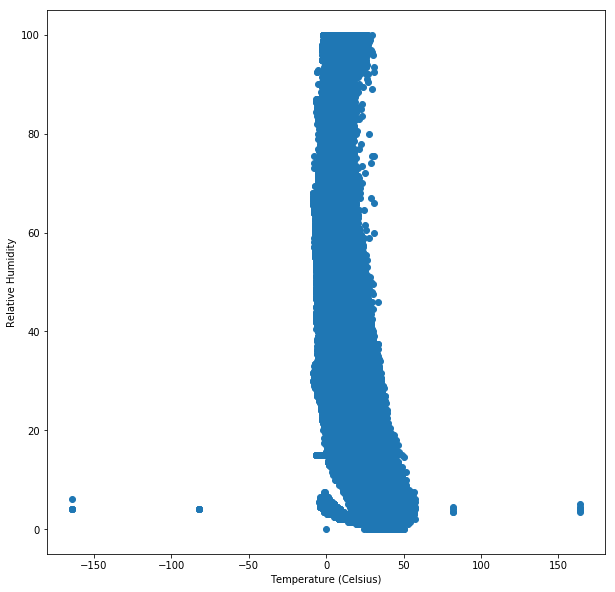

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)

# extract temperature and humidity values to a numpy array for plotting

temp_humid = np.array([row[2:4] for row in data[1:]])

print(temp_humid[:5])

# make a scatter plot of temperature in celsius vs relative humidity
plt.scatter(temp_humid[:, 0], temp_humid[:, 1])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity')
plt.show()

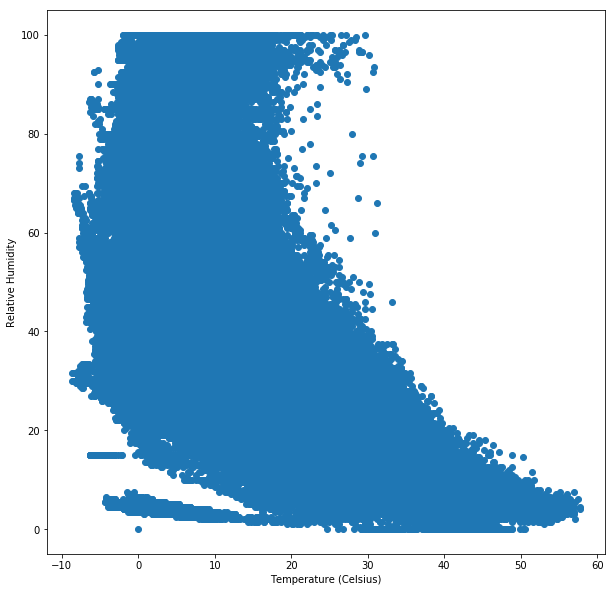

In [6]:
# there are outliers, let's remove them

temp_humid_no = np.array([row for row in temp_humid if row[0] > -50 and row[0] < 70])

# make a scatter plot of temperature in celsius vs relative humidity

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(temp_humid_no[:, 0], temp_humid_no[:, 1])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity')
plt.show()

In [7]:
# get the unique sensor_ids from the data set

sids = [row[0] for row in data[1:]]

unique_sids = []

for sid in sids:
    
    try:
        unique_sids.index(sid)
    except ValueError:
        unique_sids.append(sid)
        
print(sorted(unique_sids))

['00SUN1', '03WUSX', '0ADGCW', '0VB0NK', '16NFDT', '18ZC55', '253MOH', '2EVMW0', '2FI6RE', '2M3VN4', '31PQ0E', '36HP36', '3X9NU0', '3YG5OE', '4R3OVS', '4XDB42', '5XCQZA', '646WFB', '64GVM7', '69NGTJ', '6Q79N3', '6XCIEU', '88W4MC', '8CR27Y', '8EK1KA', '99KXAO', '9HV2AA', '9WKDCB', '9XIWQM', 'AR5SEY', 'B106NA', 'B2A6KN', 'BJ76OM', 'BLMQB0', 'BWDOY2', 'C7EULH', 'CAB61X', 'CDF20O', 'CNMGKL', 'CSFE5E', 'CUPV5D', 'D5XN92', 'D6FO0Y', 'D9B8MJ', 'DG4O6F', 'DKX0PD', 'E7Y1NM', 'EIAP2T', 'EJFCH6', 'EMY75M', 'ENIUZK', 'EP3ORT', 'ETC5S0', 'EZRTC6', 'F6QAO7', 'FIY0HK', 'FMZO13', 'FS451Z', 'FYNN89', 'G0B221', 'G2RRJC', 'GA480B', 'GN0PV0', 'GNMCD5', 'H4DHK1', 'HG8IBG', 'HL5E7G', 'IBICZD', 'IL57CR', 'IQRK7T', 'IRMRC8', 'ISJ287', 'J7QLHO', 'KDSB9Q', 'KP55FE', 'KRJPWV', 'KZ7UIF', 'L69HRH', 'LQUPHP', 'LUGQBL', 'LX1BGU', 'MU54LE', 'NSFE7R', 'O02VT7', 'O51215', 'OKXM1J', 'OM9MFY', 'OZTUJH', 'PBLJEY', 'PJQDUC', 'PPTKQ6', 'QOZOKO', 'QSQ8LU', 'R0W8ND', 'R12VWN', 'R4EVN2', 'RF9GUT', 'RFJCPT', 'RRJ85Y', 'RU1ITZ',

In [8]:
# generate colors for plotting

colors = []

for i in range(0, len(unique_sids)):
    
    colors.append((np.random.random(), np.random.random(), np.random.random()))
    
print(colors[:5])

color_dict = {}

for i in range(0, len(unique_sids)):
    
    color_dict[unique_sids[i]] = colors[i]
    
print(color_dict)

[(0.8140585496498896, 0.22804234397486944, 0.9543404923259854), (0.4934894538341873, 0.8593876443101431, 0.7588357796048602), (0.39527487731129196, 0.6787787661417178, 0.9486586625904507), (0.832414111122218, 0.48493580150793747, 0.7255206519466673), (0.013085912067528627, 0.10762380851277153, 0.5652520644912341)]
{'00SUN1': (0.8140585496498896, 0.22804234397486944, 0.9543404923259854), 'E7Y1NM': (0.4934894538341873, 0.8593876443101431, 0.7588357796048602), 'J7QLHO': (0.39527487731129196, 0.6787787661417178, 0.9486586625904507), 'FIY0HK': (0.832414111122218, 0.48493580150793747, 0.7255206519466673), 'KDSB9Q': (0.013085912067528627, 0.10762380851277153, 0.5652520644912341), 'LUGQBL': (0.781147207539629, 0.863781432971205, 0.323564106747805), 'EJFCH6': (0.14424076596516333, 0.14280585227708065, 0.47235561975295026), 'OM9MFY': (0.41739767592159915, 0.05032833374826695, 0.16635207103904592), 'ZVZLX9': (0.649959795402236, 0.39124143603515393, 0.6600716167908993), '4R3OVS': (0.76472134225183

In [9]:
# let's look at number of readings by sensor_id in the dataset

readings_dict = {}
for sid in unique_sids:
    
    readings_dict[sid] = len([row for row in data[1:] if row[0] == sid])
    
print(readings_dict)

readings_values = np.array(list(readings_dict.values()))

print(readings_values)
print('Mean readings per sensor: ' + str(np.mean(readings_values)))
print('Variance of readings per sensor: ' + str(np.std(readings_values) ** 2))
print('Max readings per sensor: ' + str(np.max(readings_values)))
print('Min readings per sensor: ' + str(np.min(readings_values)))

# filter out sensors with fewer than 10000 readings
sids_filter = [sensor for (sensor, reading) in list(zip(readings_dict.keys(), readings_dict.values()))]

temp_no_filter = np.array([row[2] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] in sids_filter and row[1] < 1.523e9])
humid_no_filter = np.array([row[3] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] in sids_filter and row[1] < 1.523e9])
ids_no_filter = np.array([row[0] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] in sids_filter and row[1] < 1.523e9])
ids_no = np.array([row[0] for row in data[1:] if row[2] > -50 and row[2] < 70])

print(temp_no_filter[:5])
print(humid_no_filter[:5])
print(ids_no_filter[:5])
print(data[1:6])

{'00SUN1': 14914, 'E7Y1NM': 14577, 'J7QLHO': 4643, 'FIY0HK': 10786, 'KDSB9Q': 14454, 'LUGQBL': 10588, 'EJFCH6': 15058, 'OM9MFY': 14567, 'ZVZLX9': 9753, '4R3OVS': 14518, '16NFDT': 6222, 'BLMQB0': 11194, 'R12VWN': 12545, 'PPTKQ6': 11886, 'EP3ORT': 11773, 'ENIUZK': 11654, 'B106NA': 10408, '253MOH': 11869, '03WUSX': 11906, 'UV6ALW': 11671, 'UINMPN': 10723, 'YYYCSH': 12545, 'EMY75M': 12100, 'FMZO13': 12159, 'R0W8ND': 12626, 'ISJ287': 4611, '2EVMW0': 4567, 'L69HRH': 4597, 'PJQDUC': 4666, 'W5AKRZ': 4660, '6XCIEU': 4770, 'OKXM1J': 4612, 'S1IO6E': 4860, '3X9NU0': 4992, 'LX1BGU': 1266, 'RFJCPT': 4979, 'Y5WK4U': 4988, '9XIWQM': 4446, 'RRJ85Y': 4793, 'SN9BNN': 10193, 'O51215': 8322, 'PBLJEY': 30, '6Q79N3': 4731, 'IL57CR': 4689, 'Z5DYHL': 10589, 'D9B8MJ': 11781, 'Z2KN3N': 4680, '88W4MC': 4564, 'V8CDUF': 12446, '36HP36': 5242, 'ZWUSGV': 4477, '69NGTJ': 4234, '8EK1KA': 5106, 'KZ7UIF': 5460, 'LQUPHP': 5163, 'X0MD68': 5217, 'QSQ8LU': 4995, 'UYU4RV': 5191, 'R4EVN2': 5137, 'ZDZE2Z': 5188, '5XCQZA': 19, '

In [10]:
cs = [color_dict[sid] for sid in ids_no]

print(cs[:5])

[(0.8140585496498896, 0.22804234397486944, 0.9543404923259854), (0.8140585496498896, 0.22804234397486944, 0.9543404923259854), (0.8140585496498896, 0.22804234397486944, 0.9543404923259854), (0.8140585496498896, 0.22804234397486944, 0.9543404923259854), (0.4934894538341873, 0.8593876443101431, 0.7588357796048602)]


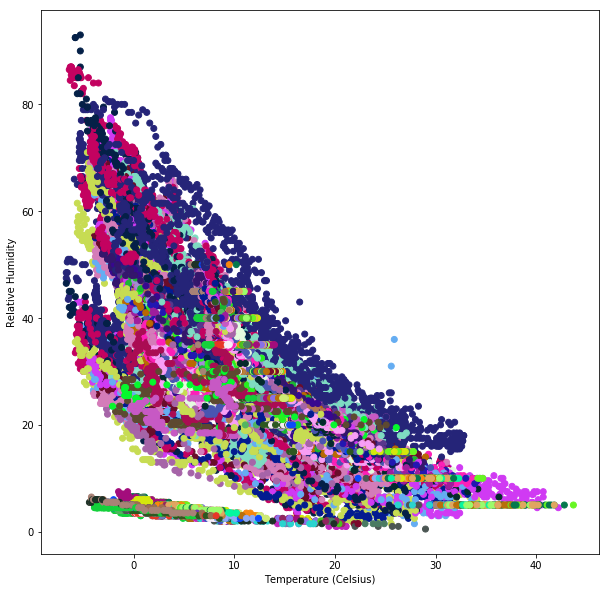

In [11]:
# make a scatter plot of temperature in celsius vs relative humidity

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(temp_no_filter, humid_no_filter, c=np.array(cs))
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity')
plt.show()

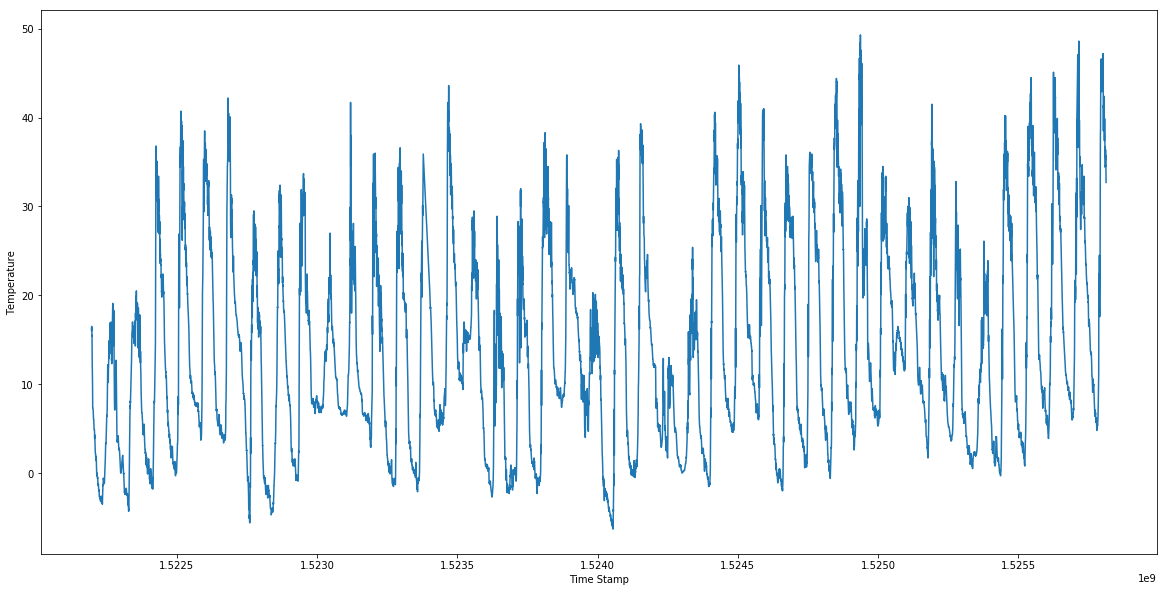

In [12]:
# plot time_stamp vs temperature

plt.rcParams['figure.figsize'] = (20, 10)

time_stamp_no_sun = np.array([row[1] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] == '00SUN1'])
temp_no_sun = np.array([row[2] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] == '00SUN1'])
humid_no_sun = np.array([row[3] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] == '00SUN1'])
plt.plot(time_stamp_no_sun, temp_no_sun)
plt.xlabel('Time Stamp')
plt.ylabel('Temperature')
plt.show()

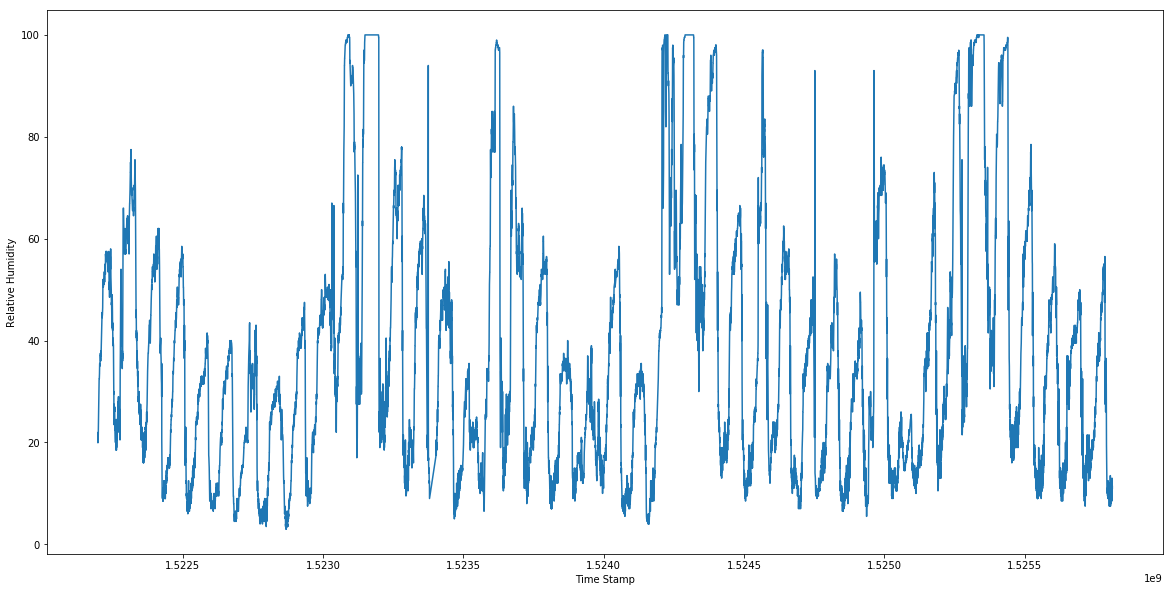

In [13]:
plt.plot(time_stamp_no_sun, humid_no_sun)
plt.xlabel('Time Stamp')
plt.ylabel('Relative Humidity')
plt.show()

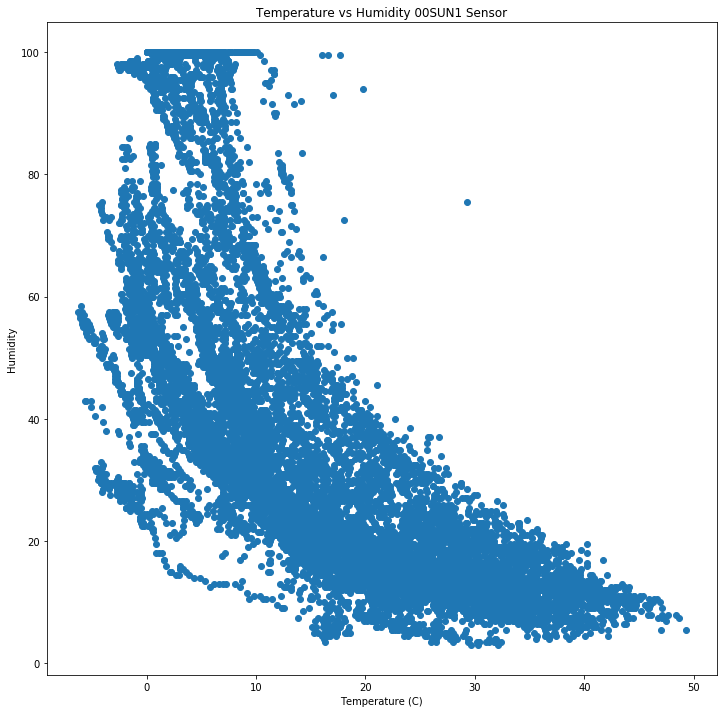

In [14]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.scatter(temp_no_sun, humid_no_sun)
plt.title('Temperature vs Humidity 00SUN1 Sensor')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

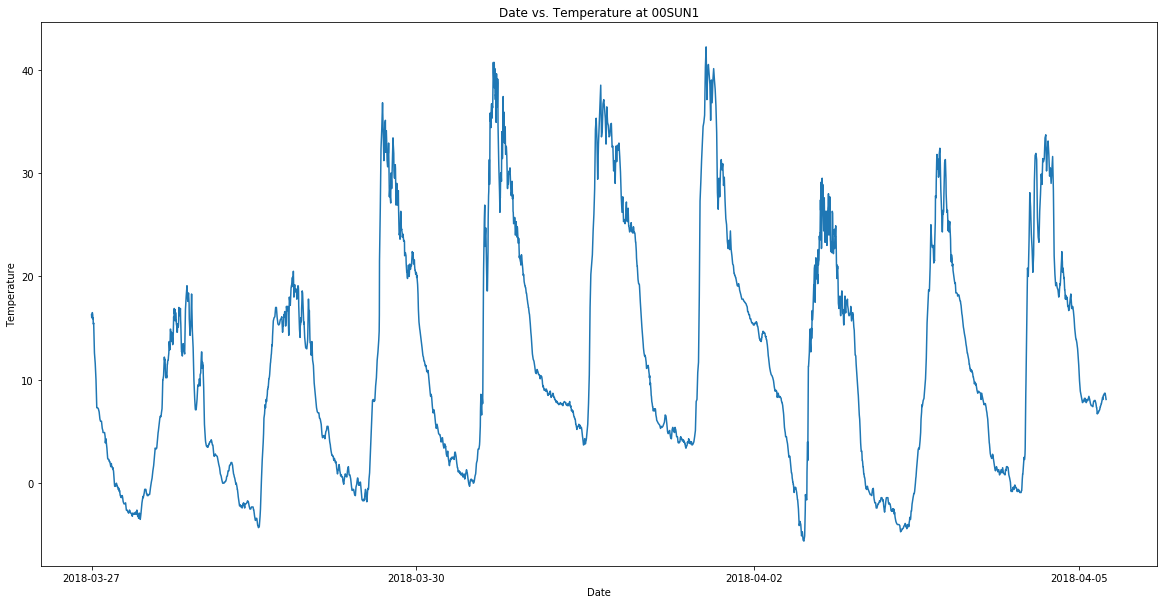

In [15]:
from datetime import date

# plot a timeseries over a reduced time interval

plt.rcParams['figure.figsize'] = (20, 10)

time_stamp_no_sun_reduced = np.array([ts for ts in time_stamp_no_sun if ts < 1.523e9])
temp_no_sun_reduced = np.array([row[2] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] == '00SUN1' and row[1] < 1.523e9])
date_no_sun_reduced = np.array([date.fromtimestamp(ts) for ts in time_stamp_no_sun_reduced])

locs = []
tick_labels = []
for i in range(0, time_stamp_no_sun_reduced.shape[0]):
    
    if i % 1000 == 0:
        
        locs.append(time_stamp_no_sun_reduced[i])
        tick_labels.append(date_no_sun_reduced[i])
        

plt.plot(time_stamp_no_sun_reduced, temp_no_sun_reduced)
plt.title('Date vs. Temperature at 00SUN1')
plt.xlabel('Date')
plt.xticks(locs, tick_labels)
plt.ylabel('Temperature')
plt.show()

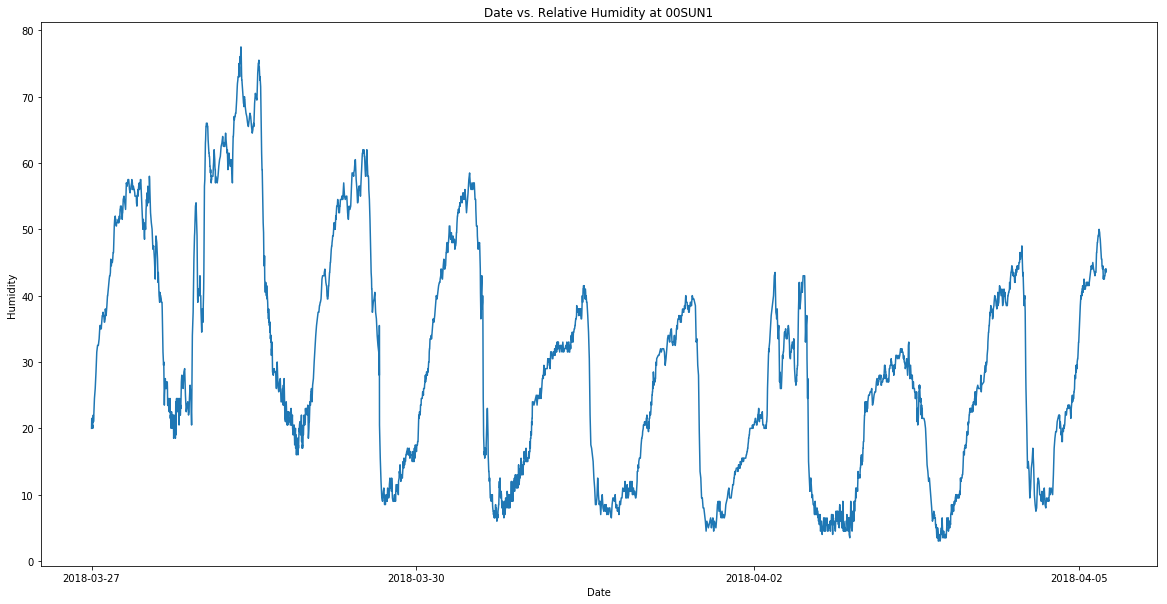

In [16]:
# plot date vs. relative humitdity at 00SUN1 from March 27 through April 5

humid_no_sun_reduced = np.array([row[3] for row in data[1:] if row[2] > -50 and row[2] < 70 and row[0] == '00SUN1' and row[1] < 1.523e9])


plt.plot(time_stamp_no_sun_reduced, humid_no_sun_reduced)
plt.title('Date vs. Relative Humidity at 00SUN1')
plt.xlabel('Date')
plt.xticks(locs, tick_labels)
plt.ylabel('Humidity')
plt.show()

In [17]:
from datetime import datetime

# Takes in two strings specifying the start and end dates of a time series
# Dates must be formatted as YYYY-MM-DD, and must lie within the range of the 
# Smart yields dataset
# Plots the time series using pyplot
# Plots for a single sensors
def plot_temperature_time_series(start_date, end_date, sensor_id, fahrenheit=False):
    
    if sensor_id not in unique_sids:
        raise ValueError("Invalid Sensor ID for this data set")
    
    start_year = int(start_date[0:4])
    start_month = int(start_date[5:7])
    start_day = int(start_date[8:])
    
    end_year = int(end_date[0:4])
    end_month = int(end_date[5:7])
    end_day = int(end_date[8:])
    
    start = datetime(start_year, start_month, start_day)
    end = datetime(end_year, end_month, end_day)
    
    start_ts = start.timestamp()
    end_ts = end.timestamp()
    
    if start_ts < data[1][1] - 86400 or end_ts > data[len(data) - 1][1]:
        raise ValueError("Invalid Start or End date for this data set")
    
    temperatures = [row[2] for row in data[1:] if row[1] >= start_ts and row[1] <= end_ts and row[0] == sensor_id]
    times = [row[1] for row in data[1:] if row[1] >= start_ts and row[1] <= end_ts and row[0] == sensor_id]
    dates = [date.fromtimestamp(timestamp) for timestamp in times]
    
    ticks = [start_ts, end_ts]
    tick_labels = [start.date(), end.date()]
    
    if fahrenheit:
        
        temperatures = convert_temperatures(temperatures)
    
    plt.plot(times, temperatures)
    plt.xticks(ticks, tick_labels)
    plt.xlabel("Date")
    plt.ylabel("Temperature (Celsius)")
    plt.title("Date vs. Temperature (Celsius) at " + sensor_id)
    plt.show()
    


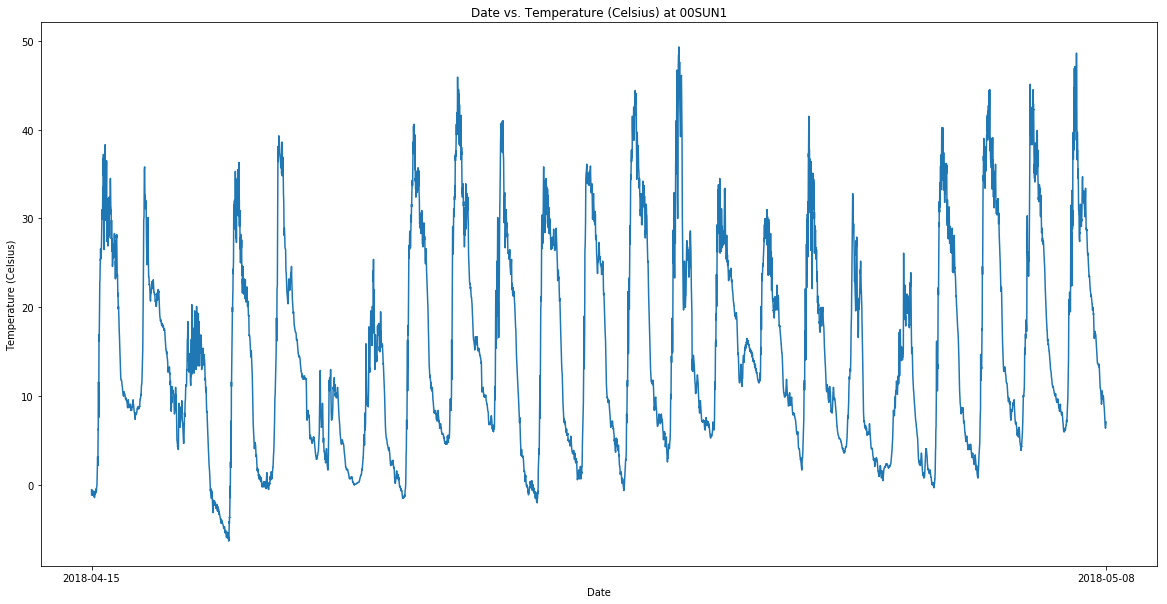

In [19]:
plot_temperature_time_series("2018-04-15", "2018-05-08", "00SUN1", fahrenheit = False)

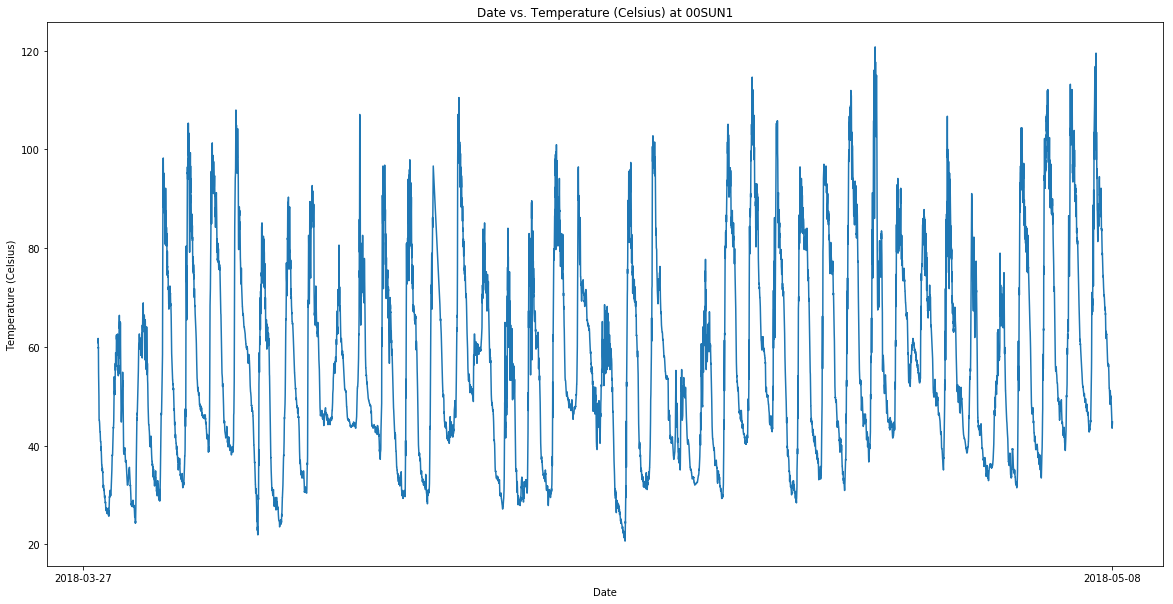

In [21]:
plot_temperature_time_series("2018-03-27", "2018-05-08", "00SUN1", fahrenheit = True)